In [49]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [50]:
import numpy as np

def initial_state(N):
    '''Generates a random spin configuration for initial condition where each spin can take values from -pi to pi'''
    state = np.random.uniform(-np.pi, np.pi, size=(N, N))
    return state


In [51]:
def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    N=len(config)
    for i in range(N):  # Loop over rows of the lattice
        for j in range(N):  # Loop over columns of the lattice
            a = np.random.randint(0, N)
            b = np.random.randint(0, N)
            s = config[a, b]  # Get the current spin value at position (a, b)
            #nb = config[(a+1)%N, b] + config[a, (b+1)%N] + config[(a-1)%N, b] + config[a, (b-1)%N]  # Sum of neighboring spins
            s_n = np.random.uniform(-np.pi, np.pi)
            E_initial = np.cos(s-config[(a+1)%N,b]) + np.cos(s-config[a,(b+1)%N]) + np.cos(s-config[(a-1)%N,b]) + np.cos(s-config[a,(b-1)%N])# Calculate the initial energy
            E_final =  np.cos(s_n-config[(a+1)%N,b]) + np.cos(s_n-config[a,(b+1)%N]) + np.cos(s_n-config[(a-1)%N,b]) + np.cos(s_n-config[a,(b-1)%N])
            cost = -E_final + E_initial
            if cost < 0:  
                s = s_n
            elif rand() < np.exp(-cost * beta):  # If flipping the spin increases the energy, accept the change with a probability based on the Metropolis criterion
                s = s_n
            config[a, b] = s  # Update the spin value at position (a, b)
    return config


In [ ]:
a=initial_state(5)
print(a)

[[-0.67759002  0.04480354 -2.16937185  1.38544567 -2.75025175]
 [ 1.68941063  2.5104783  -2.40663407 -2.45537867 -3.05830344]
 [-1.63667814 -0.17000977  2.8312693  -2.17532919  0.4565475 ]
 [-3.00437099  2.1787326   1.48476147 -1.68457463 -1.02812641]
 [ 2.81800785  0.09698928  0.19612629  2.9752304   1.31198882]]


In [ ]:
mcmove(a,1)

array([[-0.67759002,  0.04480354, -2.49994525, -2.33033044, -2.75025175],
       [ 2.72245919,  0.57903926, -2.40663407, -2.45537867, -3.05830344],
       [ 2.31627026, -0.17000977,  2.8312693 , -2.17532919, -2.21652916],
       [-3.00437099,  0.66601853,  1.48476147, -1.68457463, -1.02812641],
       [ 2.81800785, -2.92966841, -2.63417427,  3.12477118,  1.71603078]])

In [52]:
def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            s = config[i,j]
            e= np.cos(s-config[(i+1)%N,j]) + np.cos(s-config[i,(j+1)%N]) + np.cos(s-config[(i-1)%N,j]) + np.cos(s-config[i,(j-1)%N])
            #nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -e
    return energy/4.


In [53]:
def calcMag(config):
#    '''Magnetization of a given configuration'''
    def sum_cos(matrix):
        total = 0
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                total += np.cos(matrix[i,j])
        return total

    def sum_sin(matrix):
        total = 0
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                total += np.sin(matrix[i,j])
        return total

    mag = np.sqrt(sum_cos(config)**2+sum_sin(config)**2)
    return mag

In [54]:
# change these parameters for a smaller (faster) simulation
nt      = 50         #  number of temperature points
N       = 30         #  size of the lattice, N x N
eqSteps = 20   #  number of MC sweeps for equilibration
mcSteps = 4000   #  number of MC sweeps for calculation

T       = np.linspace(0.1, 2, nt);
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N)
# divide by number of samples, and by system size to get intensive values

In [55]:
#MAIN PART
for tt in range(nt):
    E1 = M1 = E2 = M2 = 0
    config = initial_state(N)
    iT=1.0/T[tt]; iT2=iT*iT;

    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        #M2 = M2 + Mag*Mag
        E2 = E2 + Ene*Ene

    E[tt] = n1*E1
    M[tt] = n1*M1
    #C[tt] = (n1*E2 - n2*E1*E1)*iT2
    #X[tt] = (n1*M2 - n2*M1*M1)*iT
C=np.gradient(E,T)
X=np.gradient(M,T)

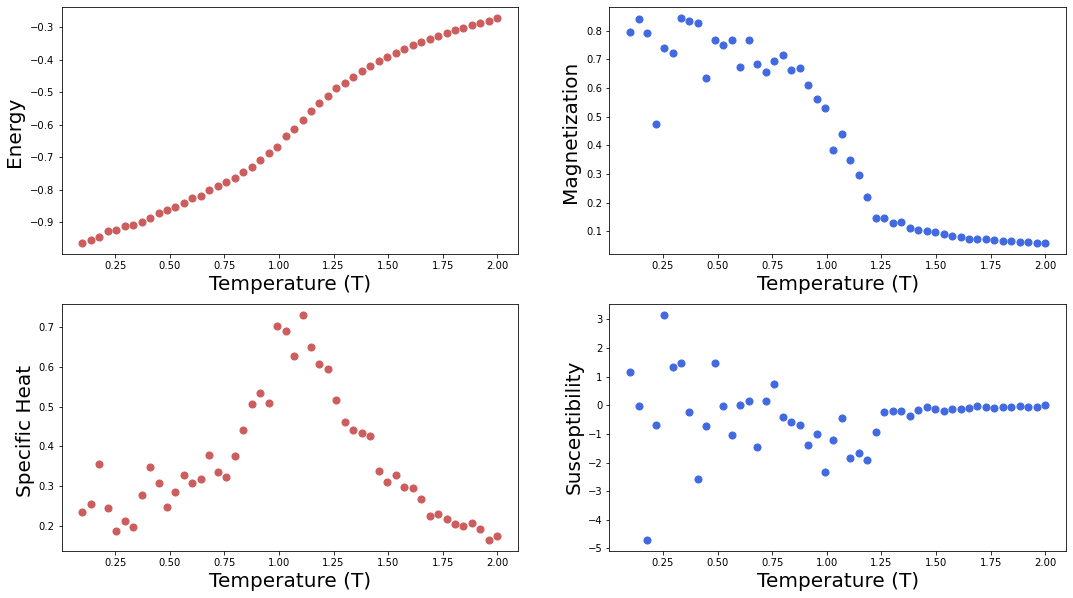

In [56]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

In [57]:
T[np.argmax(C)]

1.1081632653061226

In [58]:
np.max(C)

0.7316431501221672

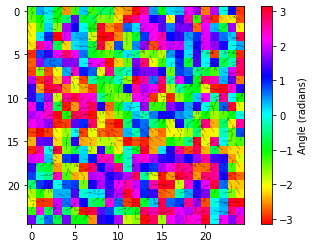

In [22]:
#Simulating the lattice animation
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter

def initial_state(N):
    '''Generates a random spin configuration for initial condition where each spin can take values from -pi to pi'''
    state = np.random.uniform(-np.pi, np.pi, size=(N, N))
    return state

def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    N = len(config)
    for i in range(N):  # Loop over rows of the lattice
        for j in range(N):  # Loop over columns of the lattice
            a = np.random.randint(0, N)
            b = np.random.randint(0, N)
            s = config[a, b]  # Get the current spin value at position (a, b)
            s_n = np.random.uniform(-np.pi, np.pi)
            E_initial = np.cos(s - config[(a + 1) % N, b]) + np.cos(s - config[a, (b + 1) % N]) + np.cos(
                s - config[(a - 1) % N, b]) + np.cos(s - config[a, (b - 1) % N])  # Calculate the initial energy
            E_final = np.cos(s_n - config[(a + 1) % N, b]) + np.cos(s_n - config[a, (b + 1) % N]) + np.cos(
                s_n - config[(a - 1) % N, b]) + np.cos(s_n - config[a, (b - 1) % N])
            cost = -E_final + E_initial
            if cost < 0:  # If flipping the spin decreases the energy, accept the change
                s = s_n
            elif rand() < np.exp(-cost * beta):  # If flipping the spin increases the energy, accept the change with a probability based on the Metropolis criterion
                s = s_n
            config[a, b] = s  # Update the spin value at position (a, b)
    return config

# Animation function
# Animation function
def animate(i):
    global config
    for _ in range(eqSteps):
        mcmove(config, iT)
    im.set_array(config)
    return im,


# Parameters
nt = 50  # number of temperature points
N = 25 # size of the lattice, N x N
eqSteps = 70  # number of MC sweeps for equilibration
mcSteps = 500  # number of MC sweeps for calculation

T = np.linspace(0.1, 50, nt)
n1 = 1.0 / (mcSteps * N * N)

# Animation function
def animate(i):
    global config, U, V
    for _ in range(eqSteps):
        mcmove(config, iT)
    im.set_array(config)

    # Update arrow directions
    U = np.cos(config)
    V = np.sin(config)
    Q.set_UVC(U, V)

    return im, Q

# Main part of the code
fig, ax = plt.subplots()
config = initial_state(N)
iT = 1.0 / 2 # inverse temperature
im = ax.imshow(config, cmap='hsv', animated=True)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Angle (radians)')

# Draw arrows
x = np.arange(N)
y = np.arange(N)
X, Y = np.meshgrid(x, y)
U = np.cos(config)
V = np.sin(config)
Q = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='black', alpha=0.5)

ani = animation.FuncAnimation(fig, animate, frames=eqSteps, interval=50, blit=True)

# Save animation as video file
writer = FFMpegWriter(fps=10)
ani.save('xy_model_animation_with_arrows.mp4', writer=writer)

plt.show()



In [ ]:
#ANNEALING (Heating the System)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter

def initial_state(N):
    '''Generates a random spin configuration for initial condition where each spin can take values from -pi to pi'''
    state = np.random.uniform(-np.pi, np.pi, size=(N, N))
    return state

def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    N = len(config)
    for i in range(N):  # Loop over rows of the lattice
        for j in range(N):  # Loop over columns of the lattice
            a = np.random.randint(0, N)
            b = np.random.randint(0, N)
            s = config[a, b]  # Get the current spin value at position (a, b)
            s_n = np.random.uniform(-np.pi, np.pi)
            E_initial = np.cos(s - config[(a + 1) % N, b]) + np.cos(s - config[a, (b + 1) % N]) + np.cos(
                s - config[(a - 1) % N, b]) + np.cos(s - config[a, (b - 1) % N])  # Calculate the initial energy
            E_final = np.cos(s_n - config[(a + 1) % N, b]) + np.cos(s_n - config[a, (b + 1) % N]) + np.cos(
                s_n - config[(a - 1) % N, b]) + np.cos(s_n - config[a, (b - 1) % N])
            cost = -E_final + E_initial
            if cost < 0:  # If flipping the spin decreases the energy, accept the change
                s = s_n
            elif np.random.rand() < np.exp(-cost * beta):  # If flipping the spin increases the energy, accept the change with a probability based on the Metropolis criterion
                s = s_n
            config[a, b] = s  # Update the spin value at position (a, b)
    return config

# Parameters
nt = 80  # number of temperature points
N = 40  # size of the lattice, N x N
eqSteps = 100  # number of MC sweeps for equilibration
mcSteps = 500  # number of MC sweeps for calculation

T = np.linspace(0.01, 1, nt)
n1 = 1.0 / (mcSteps * N * N)

# Initialize the lattice configuration
config = initial_state(N)

# Initialize the animation
fig, ax = plt.subplots()
im = ax.imshow(config, cmap='hsv')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Angle (radians)')

# Initialize quiver plot
x = np.arange(N)
y = np.arange(N)
X, Y = np.meshgrid(x, y)
U = np.cos(config)
V = np.sin(config)
quiver = ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='black', alpha=0.5)

# List to store frames for animation
frames = []

# Loop over temperature points
for i in range(nt):
    # Perform equilibration steps
    for _ in range(eqSteps):
        mcmove(config, 1.0 / T[i])

    # Save the current configuration for animation
    frames.append((np.copy(config), T[i]))

    # Set the current configuration as the initial configuration for the next temperature
    config = np.copy(config)

# Function to update the plot
def update(frame):
    im.set_array(frames[frame][0])
    U = np.cos(frames[frame][0])
    V = np.sin(frames[frame][0])
    quiver.set_UVC(U, V)
    ax.set_title(f'Temperature: {frames[frame][1]:.2f}')
    return im, quiver

# Create animation
ani = animation.FuncAnimation(fig, update, frames=nt, interval=50, blit=True)

# Save animation as video file
writer = FFMpegWriter(fps=5)
ani.save('xy_model_animation_with_temperature_40_100_3rd.mp4', writer=writer)

plt.show()
